In [1]:
import cv2
import torch
import torchvision
import numpy as np
from google.colab import drive
from google.colab.patches import cv2_imshow
from torchvision.io.image import read_image
from torchvision.models.detection import maskrcnn_resnet50_fpn, MaskRCNN_ResNet50_FPN_Weights

print(torchvision.__version__)
drive.mount("/content/gdrive")

0.14.0+cu116
Mounted at /content/gdrive


In [ ]:
cv2_img = cv2.imread("/content/gdrive/MyDrive/Colab Notebooks/SKT_FLY_AI/project/image/q4.jpg", cv2.IMREAD_COLOR)
cv2_imshow(cv2_img)   # 주석처리 할 것

In [221]:
test_img1 = cv2.imread("/content/gdrive/MyDrive/Colab Notebooks/SKT_FLY_AI/project/image/q1.jpg", cv2.IMREAD_COLOR)
test_img1 = cv2.resize(test_img1, (800, 600))
test_img2 = cv2.imread("/content/gdrive/MyDrive/Colab Notebooks/SKT_FLY_AI/project/image/q2.jpg", cv2.IMREAD_COLOR)
test_img2 = cv2.resize(test_img2, (800, 600))
test_img3 = cv2.imread("/content/gdrive/MyDrive/Colab Notebooks/SKT_FLY_AI/project/image/q6.jpg", cv2.IMREAD_COLOR)
test_img3 = cv2.resize(test_img3, (800, 600))
test_img4 = cv2.imread("/content/gdrive/MyDrive/Colab Notebooks/SKT_FLY_AI/project/image/q5.jpg", cv2.IMREAD_COLOR)
test_img4 = cv2.resize(test_img4, (800, 600))

In [222]:
x_img = np.array([test_img1,test_img2, test_img3, test_img4])

In [223]:
for i in range(x_img.shape[0]):
    cv2_imshow(x_img[i])

Output hidden; open in https://colab.research.google.com to view.

In [224]:
x_img.shape

(4, 600, 800, 3)

In [225]:
img_num = x_img.shape[0]
img_num

4

In [226]:
weights = MaskRCNN_ResNet50_FPN_Weights.DEFAULT
transform = weights.transforms()

model = maskrcnn_resnet50_fpn(weights=weights)
model = model.eval()

In [227]:
print(type(x_img), x_img.shape)
tmp_img = torch.from_numpy(x_img)
print(type(tmp_img), tmp_img.shape)

<class 'numpy.ndarray'> (4, 600, 800, 3)
<class 'torch.Tensor'> torch.Size([4, 600, 800, 3])


In [396]:
qwe = []
qq = torchvision.transforms.ToTensor()

# 리스트에 torch image 타입으로 저장
for i in range(x_img.shape[0]):
    qwe.append(qq(x_img[i]))

In [397]:
print(len(qwe))
print(qwe[0].shape)
print(type(qwe[0]))

4
torch.Size([3, 600, 800])
<class 'torch.Tensor'>


In [398]:
# torch_img = read_image("/content/gdrive/MyDrive/Colab Notebooks/SKT_FLY_AI/project/image/q4.jpg")
# torch_img = transform(torch_img).unsqueeze(0)
torch_img = [transform(q) for q in qwe]


outputs = model(torch_img)

In [399]:
print(type(outputs))
print(len(outputs))
print(type(outputs[0]), len(outputs))

<class 'list'>
4
<class 'dict'> 4


In [400]:
print(outputs[0].keys())

dict_keys(['boxes', 'labels', 'scores', 'masks'])


In [401]:
for i in range(img_num):
    print(outputs[i]["labels"])
    print(outputs[i]["scores"], "\n")

tensor([18,  2,  8, 47,  3, 64,  2,  2,  1,  1, 64, 64, 62, 15, 72,  2,  1, 64,
         2, 15,  1,  1])
tensor([0.9967, 0.9901, 0.8277, 0.4916, 0.4161, 0.4061, 0.2499, 0.2498, 0.1859,
        0.1849, 0.1808, 0.1767, 0.1602, 0.1291, 0.1156, 0.1049, 0.0821, 0.0671,
        0.0655, 0.0602, 0.0526, 0.0519], grad_fn=<IndexBackward0>) 

tensor([3, 3, 3, 3, 3, 8, 8, 3, 3, 1, 1, 3, 1, 6, 3, 1, 7, 3, 3, 3, 1])
tensor([0.9963, 0.9923, 0.9023, 0.8120, 0.5145, 0.3619, 0.3531, 0.2771, 0.2042,
        0.1281, 0.1213, 0.1206, 0.0953, 0.0952, 0.0824, 0.0772, 0.0695, 0.0664,
        0.0613, 0.0588, 0.0513], grad_fn=<IndexBackward0>) 

tensor([61, 34, 52, 67, 86, 67, 51, 34, 52, 42])
tensor([0.9815, 0.8744, 0.7518, 0.4486, 0.2996, 0.2241, 0.2110, 0.1680, 0.0641,
        0.0501], grad_fn=<IndexBackward0>) 

tensor([ 1,  1,  1, 19,  1, 18, 18,  1, 19, 21,  1, 19, 17,  1, 18, 19, 62, 18,
        22, 21, 19, 63,  1, 21, 90, 20, 18])
tensor([0.9669, 0.9003, 0.6382, 0.6249, 0.6154, 0.5327, 0.4571, 0.3497, 0.

In [402]:
print(outputs[0]["masks"].shape)
print(outputs[0]["labels"].shape)
print(outputs[0]["scores"].shape)

torch.Size([22, 1, 600, 800])
torch.Size([22])
torch.Size([22])


In [403]:
# boxes 버리고 각 이미지에서 레이블 중복되는 거 버림

for i in range(img_num):
    outputs[i]["labels"] = outputs[i]["labels"].detach().numpy()
    outputs[i]["scores"] = outputs[i]["scores"].detach().numpy()
    outputs[i]["masks"] = torch.squeeze(outputs[i]["masks"], 1)   ######
    outputs[i]["masks"] = outputs[i]["masks"].detach().numpy()
    del outputs[i]["boxes"]
    zz = []

    for j in range(1, len(outputs[i]["labels"])):
        if outputs[i]["labels"][j] in outputs[i]["labels"][:j]:
            zz.append(j)

    # outputs[i]["labels"] = torch.from_numpy(np.delete(outputs[i]["labels"], zz))
    # outputs[i]["scores"] = torch.from_numpy(np.delete(outputs[i]["scores"], zz))
    outputs[i]["labels"] = np.delete(outputs[i]["labels"], zz)
    outputs[i]["scores"] = np.delete(outputs[i]["scores"], zz)

    tmp1 = outputs[i]["masks"].shape[1]
    tmp2 = outputs[i]["masks"].shape[2]

    outputs[i]["masks"] = outputs[i]["masks"].reshape(outputs[i]["masks"].shape[0], -1)
    outputs[i]["masks"] = np.delete(outputs[i]["masks"], zz, axis=0)
    # outputs[i]["masks"] = outputs[i]["masks"].reshape(outputs[i]["masks"].shape[0], 1, tmp1, tmp2)


In [404]:
print(outputs[0]["masks"].shape)
print(outputs[0]["labels"].shape)
print(outputs[0]["scores"].shape)


(10, 480000)
(10,)
(10,)


In [405]:
for i in range(img_num):
    print(outputs[i]["labels"])
    print(outputs[i]["scores"], "\n")

[18  2  8 47  3 64  1 62 15 72]
[0.99670607 0.9901355  0.8276831  0.49156332 0.4160708  0.40613505
 0.1858805  0.16017115 0.1290891  0.11560018] 

[3 8 1 6 7]
[0.99630886 0.36186954 0.12813771 0.09516533 0.06948715] 

[61 34 52 67 86 51 42]
[0.981487   0.8743582  0.7518175  0.44856438 0.29962015 0.21095027
 0.0500557 ] 

[ 1 19 18 21 17 62 22 63 90 20]
[0.9669179  0.6249385  0.5326972  0.32207975 0.17814866 0.10159767
 0.08153755 0.06053983 0.05312983 0.05106879] 



In [406]:
dic = {}

# dic에 레이블당 score가 가장 높은 애들을 저장
for i in range(img_num):
    for j in range(len(outputs[i]["labels"])):
        if outputs[i]["labels"][j] not in dic:
            dic[outputs[i]["labels"][j]] = outputs[i]["scores"][j]
        else:
            if outputs[i]["scores"][j] > dic[outputs[i]["labels"][j]]:
                dic[outputs[i]["labels"][j]] = outputs[i]["scores"][j]


# 레이블당 score가 가장 높은 애들을 제외하고 나머지는 삭제
for i in range(img_num):
    zz = []
    for j in range(len(outputs[i]["labels"])):
        if outputs[i]["labels"][j] in dic.keys():
            if dic[outputs[i]["labels"][j]] != outputs[i]["scores"][j]:
                zz.append(j)
    outputs[i]["labels"] = np.delete(outputs[i]["labels"], zz)
    outputs[i]["scores"] = np.delete(outputs[i]["scores"], zz)
    outputs[i]["masks"] = np.delete(outputs[i]["masks"], zz, axis=0)
    outputs[i]["masks"] = outputs[i]["masks"].reshape(outputs[i]["masks"].shape[0], tmp1, tmp2)


In [407]:
dic

{18: 0.99670607,
 2: 0.9901355,
 8: 0.8276831,
 47: 0.49156332,
 3: 0.99630886,
 64: 0.40613505,
 1: 0.9669179,
 62: 0.16017115,
 15: 0.1290891,
 72: 0.115600176,
 6: 0.09516533,
 7: 0.069487154,
 61: 0.981487,
 34: 0.8743582,
 52: 0.7518175,
 67: 0.44856438,
 86: 0.29962015,
 51: 0.21095027,
 42: 0.050055698,
 19: 0.6249385,
 21: 0.32207975,
 17: 0.17814866,
 22: 0.08153755,
 63: 0.060539834,
 90: 0.053129833,
 20: 0.051068787}

In [408]:
for i in range(img_num):
    print(outputs[i]["labels"])
    print(outputs[i]["scores"], "\n")

[18  2  8 47 64 62 15 72]
[0.99670607 0.9901355  0.8276831  0.49156332 0.40613505 0.16017115
 0.1290891  0.11560018] 

[3 6 7]
[0.99630886 0.09516533 0.06948715] 

[61 34 52 67 86 51 42]
[0.981487   0.8743582  0.7518175  0.44856438 0.29962015 0.21095027
 0.0500557 ] 

[ 1 19 21 17 22 63 90 20]
[0.9669179  0.6249385  0.32207975 0.17814866 0.08153755 0.06053983
 0.05312983 0.05106879] 



In [409]:
print(outputs[0]["labels"].shape)
print(outputs[0]["scores"].shape)
print(outputs[0]["masks"].shape)

(8,)
(8,)
(8, 600, 800)


In [410]:
import sys
sys.version

'3.8.16 (default, Dec  7 2022, 01:12:13) \n[GCC 7.5.0]'

In [411]:
prior_label = [1, 17, 18, 52, 53, 54, 55, 59, 60, 61, 84, 88]
real_dic = {}
score_dic = {}
proportion = 0.1
proba_threshold = 0.5

for i in prior_label:
    real_dic[i] = -1

for i in range(img_num):
    for j in range(len(outputs[i]["labels"])):
        if outputs[i]["labels"][j] in real_dic.keys():
            real_dic[outputs[i]["labels"][j]] = i
        else:
            outputs[i]["masks"][j] = np.where(outputs[i]["masks"][j] < proba_threshold, 0, outputs[i]["masks"][j])
            # outputs[i]["masks"][j] = np.where(outputs[i]["masks"][j] < proba_threshold, 0, 255).astype("uint8")
            nonzero_cnt = np.count_nonzero(outputs[i]["masks"][j])
            total_size = tmp1 * tmp2
            
            if nonzero_cnt / total_size >= proportion:
                score_dic[outputs[i]["labels"][j]] = outputs[i]["scores"][j]

In [412]:
real_dic

{1: 3,
 17: 3,
 18: 0,
 52: 2,
 53: -1,
 54: -1,
 55: -1,
 59: -1,
 60: -1,
 61: 2,
 84: -1,
 88: -1}

In [413]:
del_list = []

for i in real_dic.keys():
    if real_dic[i] == -1:
        del_list.append(i)

for i in del_list:
    del real_dic[i]

real_dic

{1: 3, 17: 3, 18: 0, 52: 2, 61: 2}

In [414]:
score_dic

{2: 0.9901355,
 7: 0.069487154,
 67: 0.44856438,
 86: 0.29962015,
 51: 0.21095027,
 19: 0.6249385,
 21: 0.32207975,
 22: 0.08153755,
 20: 0.051068787}

In [415]:
score_dic = dict(sorted(score_dic.items(), key=lambda x: x[1], reverse=True))
score_dic

{2: 0.9901355,
 19: 0.6249385,
 67: 0.44856438,
 21: 0.32207975,
 86: 0.29962015,
 51: 0.21095027,
 22: 0.08153755,
 7: 0.069487154,
 20: 0.051068787}

In [416]:
print(real_dic)
print(score_dic)

{1: 3, 17: 3, 18: 0, 52: 2, 61: 2}
{2: 0.9901355, 19: 0.6249385, 67: 0.44856438, 21: 0.32207975, 86: 0.29962015, 51: 0.21095027, 22: 0.08153755, 7: 0.069487154, 20: 0.051068787}


In [417]:
for i in range(img_num):
    for j in range(len(outputs[i]["labels"])):
        if outputs[i]["labels"][j] in score_dic.keys():
            score_dic[outputs[i]["labels"][j]] = i

In [418]:
print(real_dic)
print(score_dic)

{1: 3, 17: 3, 18: 0, 52: 2, 61: 2}
{2: 0, 19: 3, 67: 2, 21: 3, 86: 2, 51: 2, 22: 3, 7: 1, 20: 3}


In [419]:
heart = False

while len(real_dic.keys()) != 6:
    if len(real_dic.keys()) > 6:
        del real_dic[list(real_dic.keys())[-1]]
    elif len(real_dic.keys()) < 6:
        if len(score_dic.keys()) >= 1:
            real_dic[list(score_dic.keys())[0]] = score_dic[list(score_dic.keys())[0]]
            del score_dic[list(score_dic.keys())[0]]
        else:
            heart = True
            break

        


In [420]:
print(real_dic)
print(score_dic)

{1: 3, 17: 3, 18: 0, 52: 2, 61: 2, 2: 0}
{19: 3, 67: 2, 21: 3, 86: 2, 51: 2, 22: 3, 7: 1, 20: 3}


In [421]:
for i in range(img_num):
    print(outputs[i]["labels"])
    print(outputs[i]["scores"], "\n")

[18  2  8 47 64 62 15 72]
[0.99670607 0.9901355  0.8276831  0.49156332 0.40613505 0.16017115
 0.1290891  0.11560018] 

[3 6 7]
[0.99630886 0.09516533 0.06948715] 

[61 34 52 67 86 51 42]
[0.981487   0.8743582  0.7518175  0.44856438 0.29962015 0.21095027
 0.0500557 ] 

[ 1 19 21 17 22 63 90 20]
[0.9669179  0.6249385  0.32207975 0.17814866 0.08153755 0.06053983
 0.05312983 0.05106879] 



In [422]:
for i in range(img_num):
    print(outputs[i]["labels"].shape)
    print(outputs[i]["scores"].shape)
    print(outputs[i]["masks"].shape, "\n\n")


(8,)
(8,)
(8, 600, 800) 


(3,)
(3,)
(3, 600, 800) 


(7,)
(7,)
(7, 600, 800) 


(8,)
(8,)
(8, 600, 800) 




In [423]:
# outputs에서 사용할 label, score, mask 빼고 다 삭제

for i in range(img_num):
    zz = []

    for j in range(len(outputs[i]["labels"])):
        if outputs[i]["labels"][j] not in real_dic.keys():
            zz.append(j)

    outputs[i]["labels"] = np.delete(outputs[i]["labels"], zz)
    outputs[i]["scores"] = np.delete(outputs[i]["scores"], zz)
    outputs[i]["masks"] = np.delete(outputs[i]["masks"], zz, axis=0)

In [424]:
for i in range(img_num):
    print(outputs[i]["labels"])
    print(outputs[i]["scores"], "\n")


[18  2]
[0.99670607 0.9901355 ] 

[]
[] 

[61 52]
[0.981487  0.7518175] 

[ 1 17]
[0.9669179  0.17814866] 



In [425]:
for i in range(img_num):
    print(type(outputs[i]["labels"]))
    print(type(outputs[i]["scores"]))
    print(type(outputs[i]["masks"]), "\n")


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'> 

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'> 

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'> 

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'> 



In [426]:
print(outputs[0]["masks"].shape)
print(outputs[0]["labels"].shape)
print(outputs[0]["scores"].shape)

(2, 600, 800)
(2,)
(2,)


In [427]:
for i in range(img_num):
    outputs[i]["labels"] = torch.from_numpy(outputs[i]["labels"])
    outputs[i]["scores"] = torch.from_numpy(outputs[i]["scores"])
    # outputs[i]["masks"] = torch.from_numpy(outputs[i]["masks"])
    # outputs[i]["masks"] = torch.squeeze(outputs[i]["masks"], 1)

In [428]:
for i in range(img_num):
    print(outputs[i]["masks"].shape)
    print(outputs[i]["labels"].shape)
    print(outputs[i]["scores"].shape, "\n")

(2, 600, 800)
torch.Size([2])
torch.Size([2]) 

(0, 600, 800)
torch.Size([0])
torch.Size([0]) 

(2, 600, 800)
torch.Size([2])
torch.Size([2]) 

(2, 600, 800)
torch.Size([2])
torch.Size([2]) 



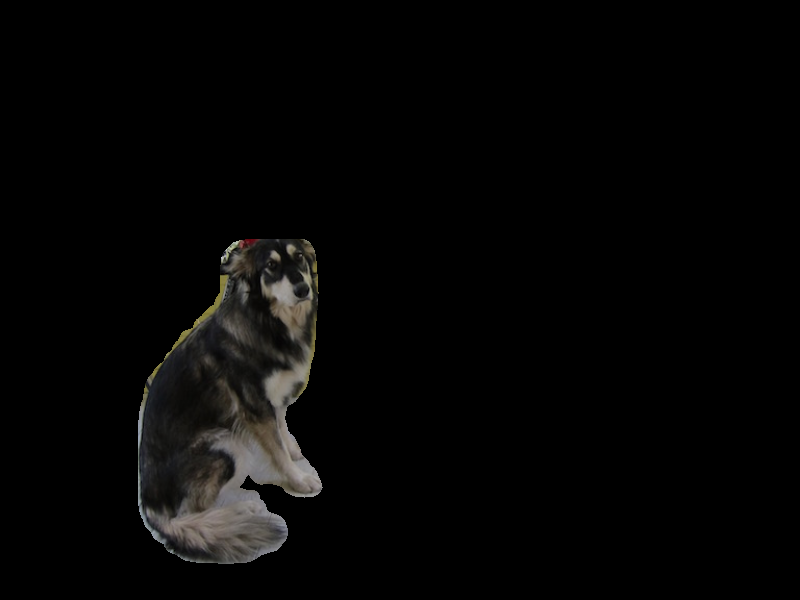

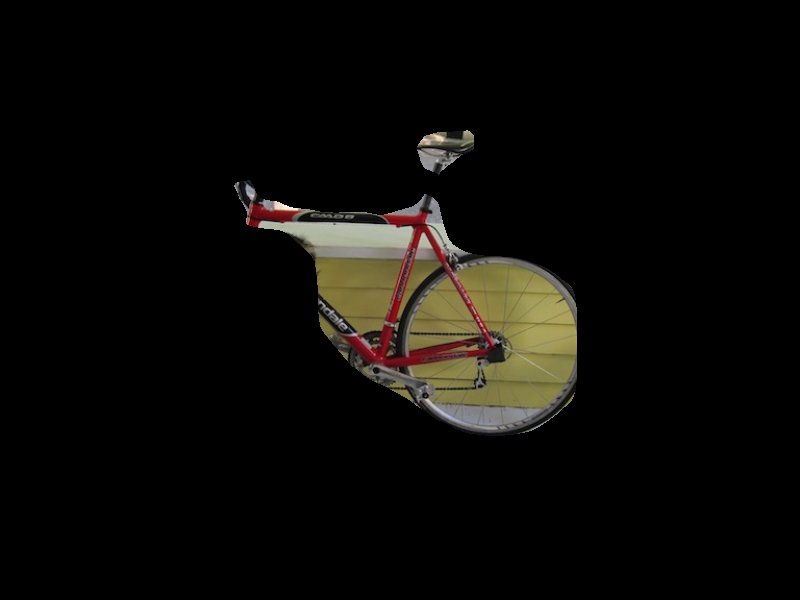

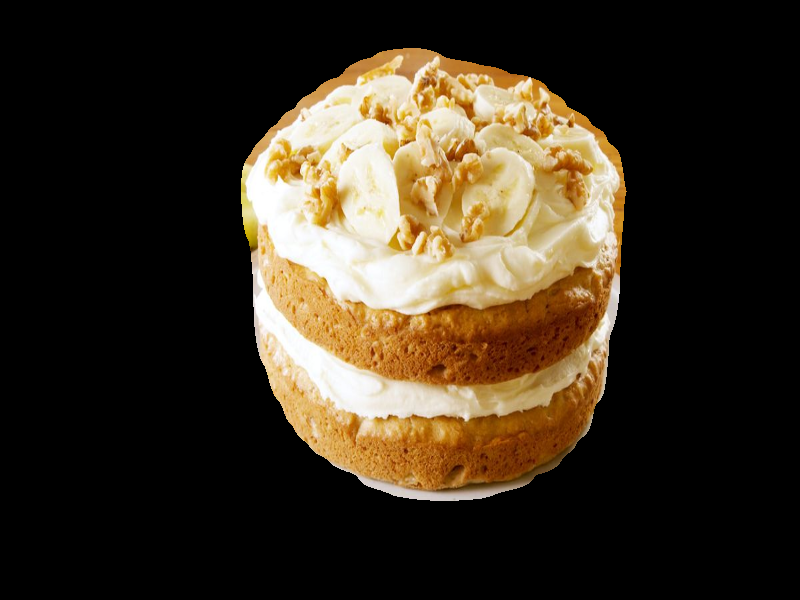

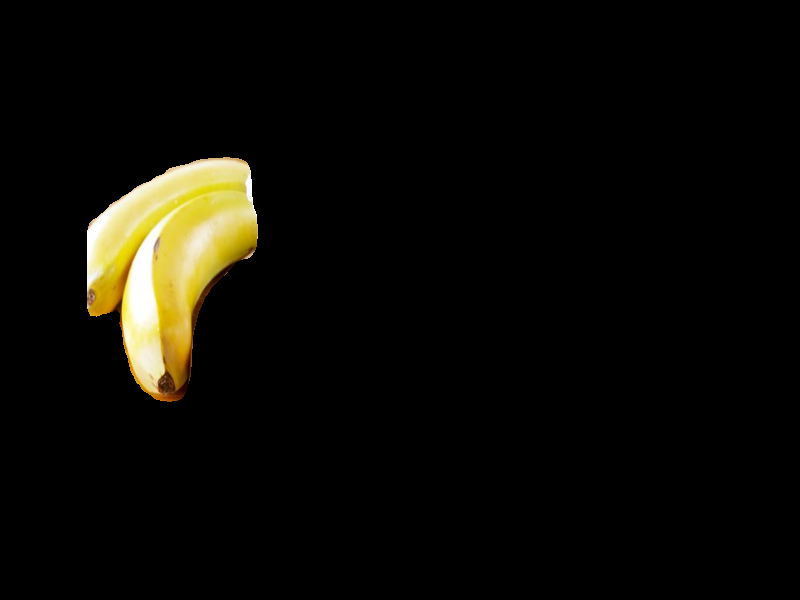

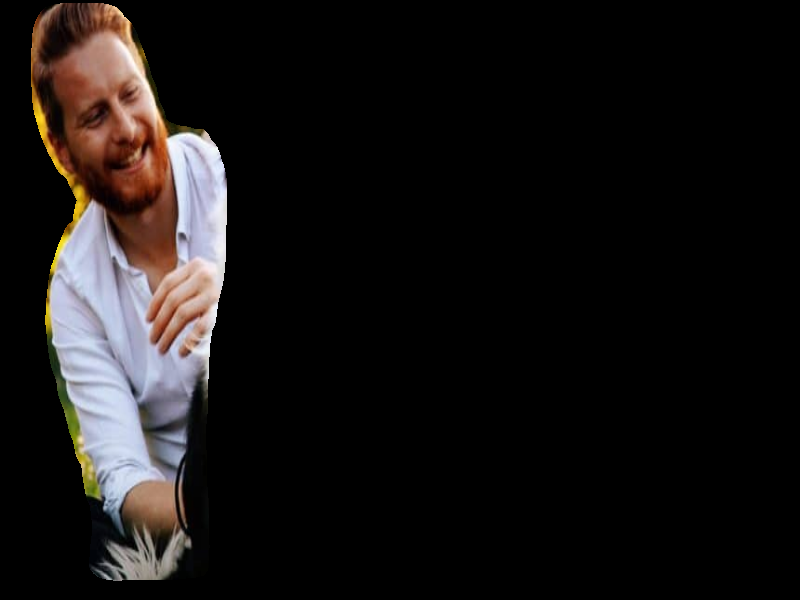

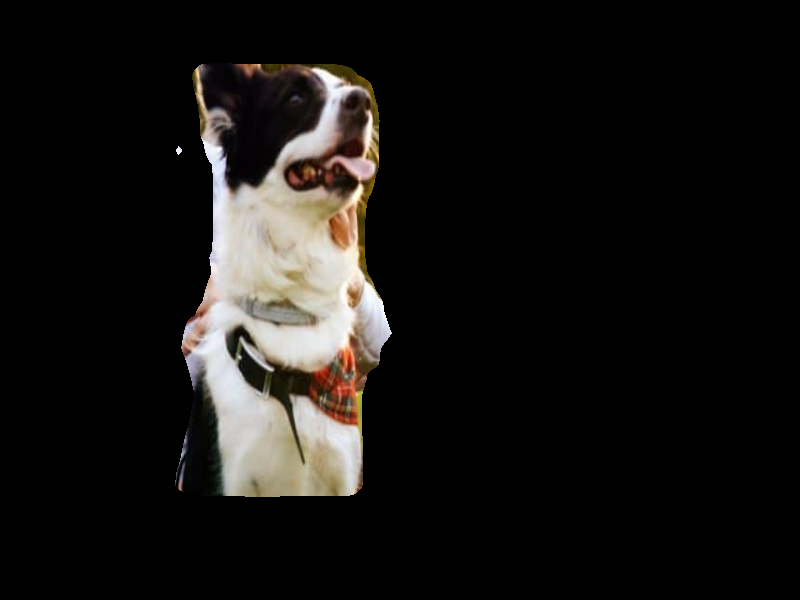

In [431]:
asd = []

for i in range(img_num):
    for j in range(len(outputs[i]["masks"])):
        # print(outputs[i]["masks"][j].dtype)
        # print(np.max(outputs[i]["masks"][j]))
        outputs[i]["masks"][j] = np.where(outputs[i]["masks"][j] < 0.25, 0, 255)
        # print(np.max(outputs[i]["masks"][j]))
        # outputs[i]["masks"][j] = outputs[i]["masks"][j].astype("uint8")
        # outputs[i]["masks"] = np.asarray(outputs[i]["masks"], dtype = np.uint8)
        # print(outputs[i]["masks"][j].dtype)
        # print(outputs[i]["masks"].dtype)
        dst = x_img[i].copy()
        dst = cv2.bitwise_and(dst, dst, mask=outputs[i]["masks"][j].astype("uint8"))
        asd.append(dst)
        cv2_imshow(dst)



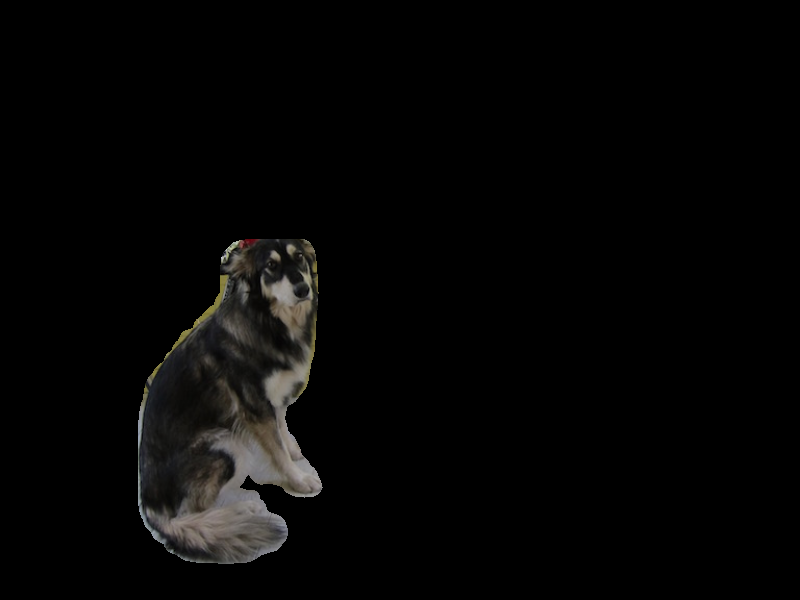

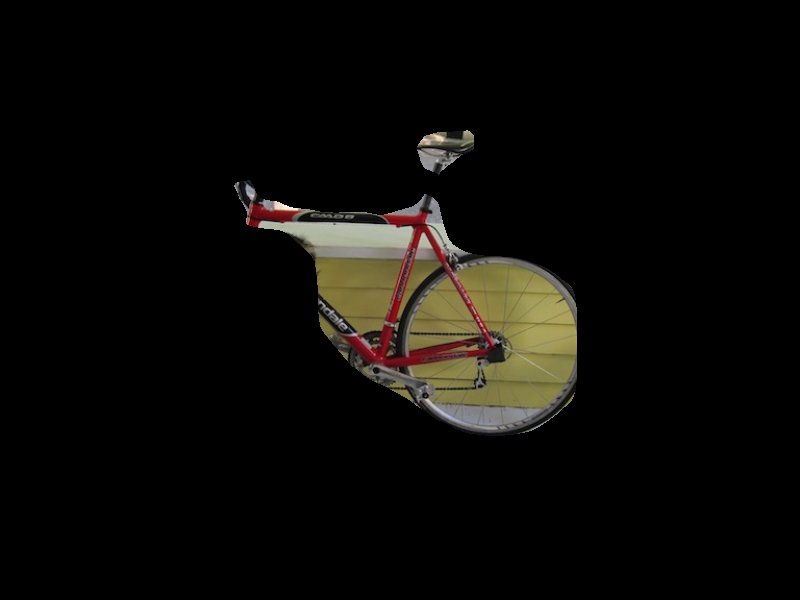

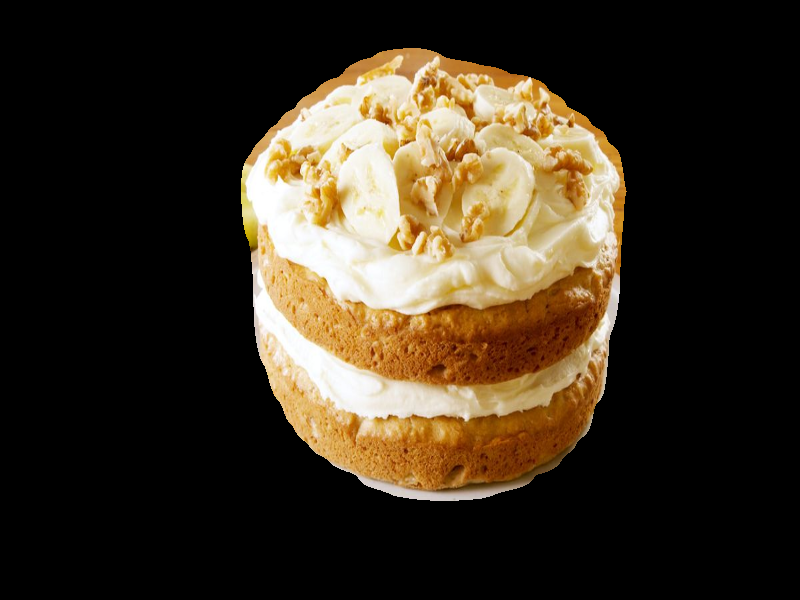

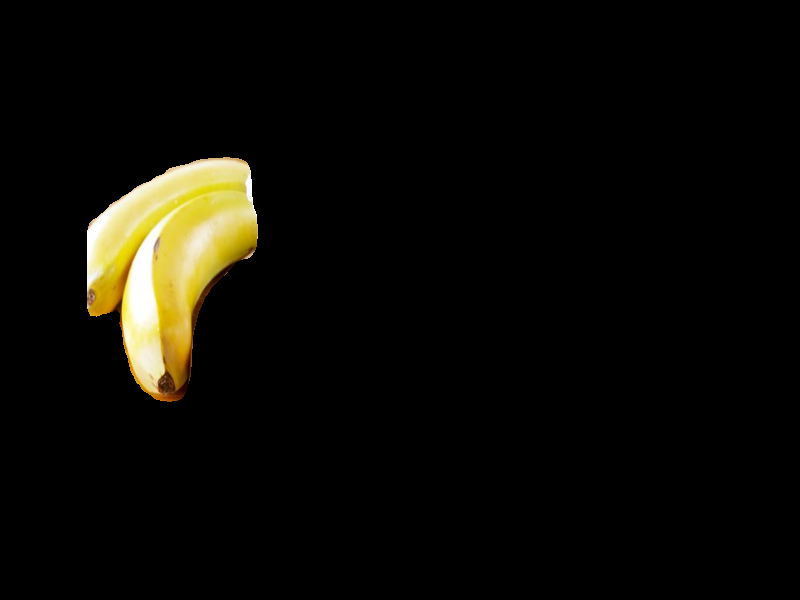

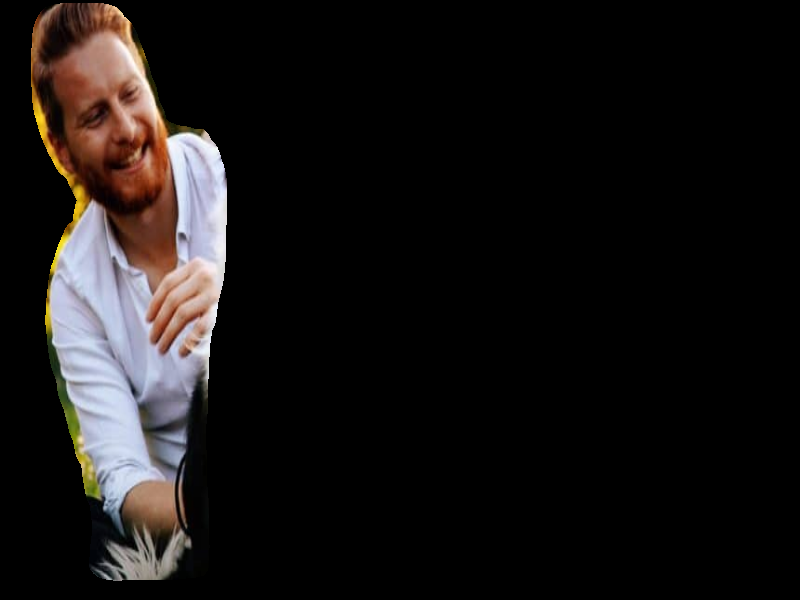

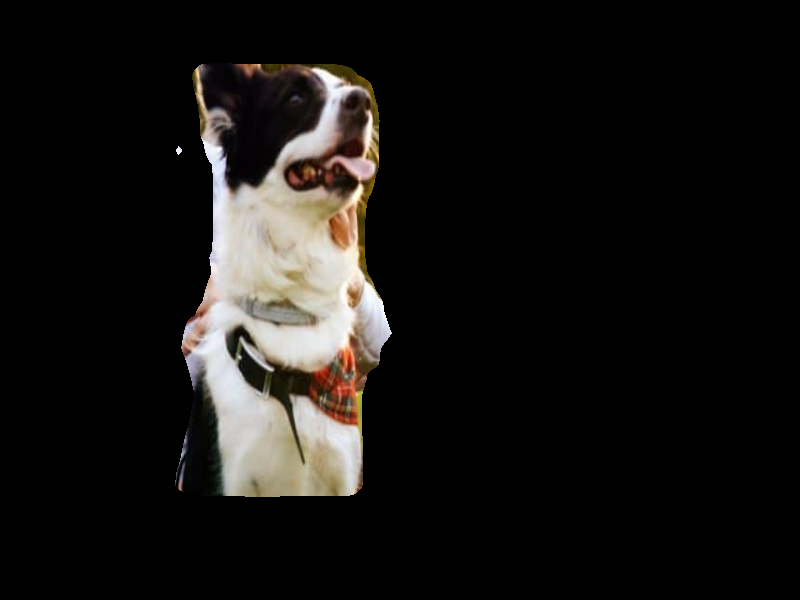

In [435]:
for i in asd:
    cv2_imshow(i)

In [430]:
for i in range(img_num):
    for j in range(len(outputs[i]["masks"])):
        dst = x_img[i].copy()
        dst = cv2.bitwise_and(dst, dst, mask=outputs[i]["masks"][j])
        cv2_imshow(dst)

error: ignored

In [ ]:
outputs[0]["masks"][0]

In [ ]:
outputs[0]["masks"].shape

In [ ]:
real_mask_dic = {}

for i in range(img_num):
    outputs[i]["masks"] = outputs[i]["masks"].numpy()
    outputs[i]["labels"] = outputs[i]["labels"].numpy()
    for j in range(outputs[i]["masks"].shape[0]):
        tmp = np.zeros((tmp1, tmp2))
        for a in range(tmp.shape[0]):
            for b in range(tmp.shape[1]):
                if outputs[i]["masks"][j][a][b] != 0:
                    tmp.itemset((a, b), 255)
                else:
                    tmp.itemset((a, b), 0)

        tmp = tmp.astype("uint8")
        real_mask_dic[outputs[i]["labels"][j]] = tmp


In [ ]:
print(real_mask_dic.keys())

In [ ]:
print(type(outputs[0]["labels"][0]))
print(type(real_mask_dic.keys()))
print(outputs[0]["labels"][0])
print(real_mask_dic.keys())

In [ ]:
print(real_dic.keys())

In [ ]:
for i in range(img_num):
    for j in range(len(outputs[i]["labels"])):
        if outputs[i]["labels"][j] in real_mask_dic.keys():
            dst = x_img[i].copy()
            dst = cv2.bitwise_and(dst, dst, mask=real_mask_dic)
            cv2_imshow(dst)


In [ ]:
for i in range(img_num):
    outputs[i]["labels"] = outputs[i]["labels"].detach().numpy()
    outputs[i]["scores"] = outputs[i]["scores"].detach().numpy()

In [ ]:
proba_threshold = 0.5   # 1번 threshold(mask)
tmp_mask = outputs["masks"] > proba_threshold
tmp_mask = tmp_mask.squeeze(1)

score_threshold = .8   # 2번 threshold(score)
boolean_mask = outputs["masks"][outputs["scores"] > score_threshold] > proba_threshold
boolean_mask = boolean_mask.squeeze(1)

numpy_tmp_mask = boolean_mask.numpy()
numpy_mask = np.zeros(numpy_tmp_mask.shape)

for i in range(numpy_tmp_mask.shape[0]):
    for j in range(numpy_tmp_mask.shape[1]):
        for k in range(numpy_tmp_mask.shape[2]):
            if numpy_tmp_mask[i][j][k] == True:
                numpy_mask.itemset((i, j, k), 255)
            else:
                numpy_mask.itemset((i, j, k), 0)

numpy_mask = numpy_mask.astype("uint8")

In [ ]:
def make_numpy_mask(output):
    proba_threshold = 0.5  # 1번 threshold(mask)
    tmp_mask = output["masks"] > proba_threshold
    tmp_mask = tmp_mask.squeeze(1)

    score_threshold = 0   # 2번 threshold(score)
    boolean_mask = output["masks"][output["scores"] > score_threshold] > proba_threshold
    boolean_mask = boolean_mask.squeeze(1)

    numpy_tmp_mask = boolean_mask.numpy()
    numpy_mask = np.zeros(numpy_tmp_mask.shape)

    for i in range(numpy_tmp_mask.shape[0]):
        for j in range(numpy_tmp_mask.shape[1]):
            for k in range(numpy_tmp_mask.shape[2]):
                if numpy_tmp_mask[i][j][k] == True:
                    numpy_mask.itemset((i, j, k), 255)
                else:
                    numpy_mask.itemset((i, j, k), 0)

    numpy_mask = numpy_mask.astype("uint8")
    return numpy_mask

In [ ]:
# cv2_imshow(dst)

numpy_mask = make_numpy_mask(output)

for i in range(numpy_mask.shape[0]):
    dst = cv2_img.copy()
    dst = cv2.bitwise_and(dst, dst, mask=numpy_mask[i])
    cv2_imshow(dst)   # 주석처리 할 것